# Entendimento do Problema

## Qual pergunta quero responder?


*   Qual é o país com maior número de avistamentos?
*   Qual é o estado/cidade com maior número de avistamentos?

*   Qual é a forma de UFO mais avistada?

*   Qual é a duração média dos avistamentos?

*   Qual é o sentimento das pessoas que avistaram?

### Importando as Bibliotecas

In [1]:
# Importando as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

### Leitura do dataset

In [2]:
# Lendo o Dataset
df = pd.read_csv('/content/ufo_sightings_scrubbed.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


### Análise Exploratória

In [3]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [4]:
df.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011,-77.265556
80331,2013-09-09 23:00:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,2013-09-30,35.6528,-97.477778


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [6]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [7]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [8]:
df.describe(include='all')

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
count,80332,80332,74535,70662,78400,80332,80332,80317,80332,80332,80332.000000
unique,69474,19900,67,5,29,705,8304,79997,317,23292,NaN
top,2010-07-04 22:00:00,seattle,ca,us,light,300,5 minutes,Fireball,2009-12-12,47.6063889,NaN
freq,36,525,9655,65114,16565,7070,4716,11,1510,481,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.772885
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.697205
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-176.658056
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-112.073333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.903611
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.755000


### Tratamento dos Dados

In [9]:
# Ajustando as colunas

In [10]:
df.rename(columns={'duration (seconds)' : 'duration_seconds', 'duration (hours/min)' : 'duration_hours_min', 'date posted' : 'date_posted'}, inplace=True)

In [11]:
df.head()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611


In [12]:
# Ajustando os tipos de dados

In [13]:
df.datetime.isnull().sum()

0

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [15]:
df.datetime.head()

0   1949-10-10 20:30:00
1   1949-10-10 21:00:00
2   1955-10-10 17:00:00
3   1956-10-10 21:00:00
4   1960-10-10 20:00:00
Name: datetime, dtype: datetime64[ns]

In [16]:
df.dtypes

datetime              datetime64[ns]
city                          object
state                         object
country                       object
shape                         object
duration_seconds              object
duration_hours_min            object
comments                      object
date_posted                   object
latitude                      object
longitude                    float64
dtype: object

In [17]:
# Colocando os valores da colunas City, State, Country em maiúsculo

In [18]:
df['city'] = df['city'].str.upper()
df['state'] = df['state'].str.upper()
df['country'] = df['country'].str.upper()

In [19]:
# Irei converter a coluna duration_seconds para minutos e excluir a coluna duration_hours_min
# Alguns dados da coluna duration_seconds estão sendo lido como string por causa do símbolo ` que foi preenchido errado. Irei alterar e fazer a conversão

In [20]:
df['duration_seconds'] = df['duration_seconds'].str.replace("2`", '2')
df['duration_seconds'] = df['duration_seconds'].str.replace("8`", '8')
df['duration_seconds'] = df['duration_seconds'].str.replace("0.5`", '0.5')

In [21]:
df['duration_seconds'] = df['duration_seconds'].astype(float)

In [22]:
df['duration_seconds'] = df['duration_seconds'] /60  #Converti para minutos

In [23]:
df.rename(columns={'duration_seconds' : 'duration_minutes'}, inplace=True)

In [24]:
df['duration_minutes'] = df['duration_minutes'].round(2)

In [25]:
df.duration_minutes.isnull().sum()

14796

In [26]:
df['duration_minutes'].median()

3.0

In [27]:
df['duration_minutes'].isnull().sum()

14796

In [28]:
# Inserindo o valor da mediana nos valores vazios
df['duration_minutes'].fillna(value= df['duration_minutes'].median(), inplace=True)

In [29]:
df['duration_minutes'].isnull().sum()

0

In [30]:
df['duration_hours_min'].isnull().sum()

0

In [31]:
df['country'].unique()

array(['US', nan, 'GB', 'CA', 'AU', 'DE'], dtype=object)

In [32]:
df['duration_hours_min'].unique()

array(['45 minutes', '1-2 hrs', '20 seconds', ..., 'approx. 35 mins',
       '3 minutes or less', '~1hr+'], dtype=object)

In [33]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [34]:
df['shape'] = df['shape'].astype(str)

In [35]:
moda_shape = mode(df['shape'])
moda_shape

ModeResult(mode=array(['light'], dtype=object), count=array([16565]))

In [36]:
df['shape'].count()

80332

In [37]:
df[df['shape'] == 'light']

,datetime,city,state,country,shape,duration_minutes,duration_hours_min,comments,date_posted,latitude,longitude
1,1949-10-10 21:00:00,LACKLAND AFB,TX,NaN,light,120.00,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
4,1960-10-10 20:00:00,KANEOHE,HI,US,light,15.00,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
18,1973-10-10 23:00:00,BERMUDA NAS,NaN,NaN,light,0.33,20 sec.,saw fast moving blip on the radar scope thin w...,2002-01-11,32.364167,-64.678611
21,1974-10-10 23:00:00,HUDSON,KS,US,light,20.00,one hour?,The light chased us.,2004-07-25,38.1055556,-98.659722
22,1975-10-10 17:00:00,NORTH CHARLESTON,SC,US,light,6.00,5-6 minutes,Several Flashing UFO lights over Charleston Na...,2008-02-14,32.8544444,-79.975000
...,...,...,...,...,...,...,...,...,...,...,...
80312,2012-09-09 23:00:00,GAINESVILLE,GA,US,light,3.00,5 seconds,Ball of light,2012-09-24,34.2978,-83.824167
80316,2013-09-09 09:51:00,SAN DIEGO,CA,US,light,3.00,~4 seconds,2 white lights zig-zag over Qualcomm Stadium (...,2013-09-30,32.7153,-117.156389
80322,2013-09-09 21:00:00,ALEKSANDROW (POLAND),NaN,NaN,light,3.00,15 seconds,Two points of light following one another in a...,2013-09-30,50.4658,22.891814
80324,2013-09-09 21:00:00,HAMSTEAD (HOLLYRIDGE),NC,NaN,light,3.00,2 minutes,8 to ten lights bright orange in color large t...,2013-09-30,34.3676,-77.710548


In [38]:
moda_country = mode(df['country'])
moda_country

ModeResult(mode=array(['US'], dtype=object), count=array([65114]))

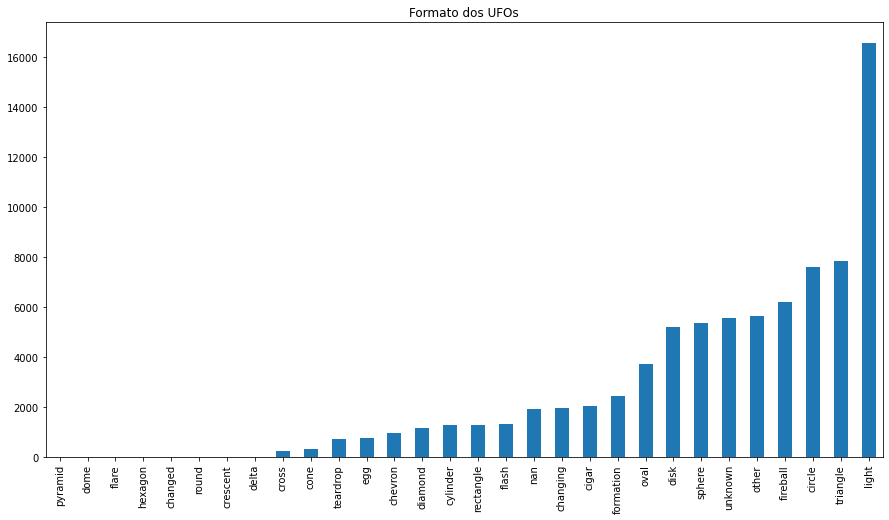

In [39]:
df['shape'].value_counts(ascending= True).plot(figsize=(15, 8), kind= 'bar', title= 'Formato dos UFOs');

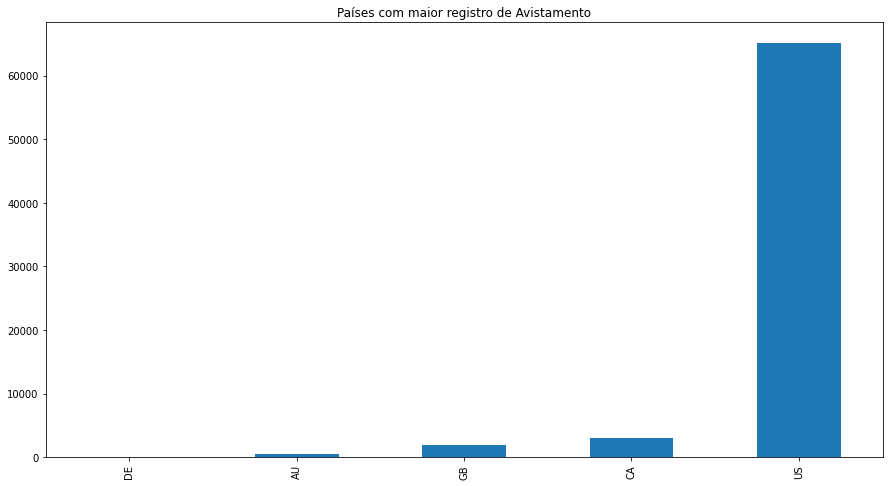

In [40]:
df['country'].value_counts(ascending= True).plot(figsize=(15, 8),kind= 'bar', title= 'Países com maior registro de Avistamento');

In [41]:
# Estatísticas de Avistamentos por país
df['country'].value_counts().describe()

count        5.000000
mean     14132.400000
std      28522.529872
min        105.000000
25%        538.000000
50%       1905.000000
75%       3000.000000
max      65114.000000
Name: country, dtype: float64

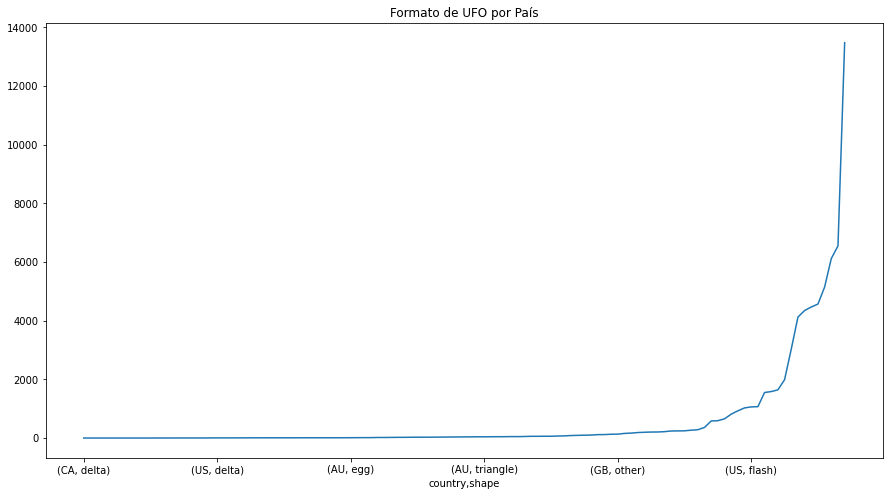

In [42]:
df[{'country', 'shape'}].value_counts(ascending=True).plot(x= df['country'], y= df['shape'], figsize=(15, 8), kind= 'line', title= 'Formato de UFO por País');

In [43]:
df.loc[df['country'] == 'US']

,datetime,city,state,country,shape,duration_minutes,duration_hours_min,comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,SAN MARCOS,TX,US,cylinder,45.00,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
3,1956-10-10 21:00:00,EDNA,TX,US,circle,0.33,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,KANEOHE,HI,US,light,15.00,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
5,1961-10-10 19:00:00,BRISTOL,TN,US,sphere,5.00,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595,-82.188889
7,1965-10-10 23:45:00,NORWALK,CT,US,disk,20.00,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,NASHVILLE,TN,US,light,3.00,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658,-86.784444
80328,2013-09-09 22:00:00,BOISE,ID,US,circle,3.00,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136,-116.202500
80329,2013-09-09 22:00:00,NAPA,CA,US,other,3.00,hour,Napa UFO&#44,2013-09-30,38.2972,-122.284444
80330,2013-09-09 22:20:00,VIENNA,VA,US,circle,3.00,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011,-77.265556


In [44]:
# Avistamentos por Cidade
df['city'].value_counts()

SEATTLE                                    525
PHOENIX                                    454
PORTLAND                                   374
LAS VEGAS                                  368
LOS ANGELES                                353
                                          ... 
KEYPORT                                      1
LAKE TAHOE (NEAR)                            1
ELECTRIC CITY                                1
TORONTO (GREATER TORONTO AREA) (CANADA)      1
WICKENBURG/KINGMAN (BETWEEN)                 1
Name: city, Length: 19900, dtype: int64

In [45]:
df['city'].nunique() #19900 cidades relataram avistamentos

19900

In [46]:
df['city'].value_counts().max()

525

In [47]:
df['city'].value_counts().min()

1

In [48]:
moda_city = mode(df['city'])
moda_city

ModeResult(mode=array(['SEATTLE'], dtype=object), count=array([525]))

In [49]:
df.loc[df['city'] == 'SEATTLE']

,datetime,city,state,country,shape,duration_minutes,duration_hours_min,comments,date_posted,latitude,longitude
113,2002-10-10 06:00:00,SEATTLE,WA,US,sphere,1.50,90 seconds,Light falls from sky,2002-10-15,47.6063889,-122.330833
143,2005-10-10 07:40:00,SEATTLE,WA,US,other,1.00,one + minutes,round symetrical with roundish flat bottom shi...,2005-10-11,47.6063889,-122.330833
197,2008-10-10 20:00:00,SEATTLE,WA,US,light,3.00,3 minutes,Around 8:00 pm? I Went out side and looked up ...,2008-10-31,47.6063889,-122.330833
393,2007-10-11 19:50:00,SEATTLE,WA,US,triangle,0.17,10 seconds,I saw two orange colored lights&#44 close toge...,2007-11-28,47.6063889,-122.330833
685,2001-10-01 01:05:00,SEATTLE,WA,US,nan,0.02,1 sec,just a meteor sighting...,2001-10-12,47.6063889,-122.330833
...,...,...,...,...,...,...,...,...,...,...,...
79563,2004-09-06 20:10:00,SEATTLE,WA,US,teardrop,3.00,3-4 seconds,orange-yellow teardrop flying very fast over s...,2004-09-29,47.6064,-122.330833
79580,2005-09-06 22:00:00,SEATTLE,WA,US,triangle,3.00,10 seconds,Triangular craft w/ large&#44dim yellow-orange...,2005-10-11,47.6064,-122.330833
79722,2002-09-07 01:30:00,SEATTLE,WA,US,triangle,3.00,20 seconds,Large black triangle w/ 3 lights on tips hover...,2002-09-13,47.6064,-122.330833
79729,2002-09-07 21:30:00,SEATTLE,WA,US,circle,3.00,15 minutes,Very large white&#44 green and red light hover...,2002-09-13,47.6064,-122.330833


In [50]:
duration_minutes = df['duration_minutes']

In [51]:
duration_minutes.to_frame

<bound method Series.to_frame of 0         45.00
1        120.00
2          0.33
3          0.33
4         15.00
          ...  
80327      3.00
80328      3.00
80329      3.00
80330      3.00
80331      3.00
Name: duration_minutes, Length: 80332, dtype: float64>

In [52]:
duration_minutes.idxmax()

559

In [53]:
duration_minutes.iloc[559]

1630600.0

In [54]:
duration_minutes.idxmin()

1659

In [55]:
duration_minutes.iloc[1659]

0.0

In [56]:
duration_minutes.isnull().sum()

0

In [57]:
# Duração Média em minutos dos Avistamentos
duration_minutes.mean()

117.63805133694886